In [2]:
%pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial import distance as dist
import math
from scipy import ndimage
from skimage import measure
import numpy as np

In [4]:
def get_file_path(iq_number):
    # Convert number (1-10) to file path "iq_images/iq{i}.png" but with a leading zero if i < 10
    return f"iq_images/iq{str(iq_number).zfill(2)}.png"

def get_image(file_path):
    original_image = cv2.imread(file_path)
    return original_image

def get_grayscale_image(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def get_contours(image, isGray = False):
    gray = get_grayscale_image(image) if not isGray else image
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def show_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

def show_images_grid(images):
    # Display the cropped images for visual verification
    grid_size = int(np.sqrt(len(images)))
    fig, axs = plt.subplots(grid_size, grid_size, figsize=(10, 10))
    for i, ax in enumerate(axs.flat):
        ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

def draw_contours(image, contours, same_color=False):
    # Rainbow colors in BGR format
    rainbow_colors = [
        (0, 0, 255),     # Red
        (0, 165, 255),   # Orange
        (0, 255, 255),   # Yellow
        (0, 255, 0),     # Green
        (255, 0, 0),     # Blue
        (130, 0, 75),    # Indigo
        (238, 130, 238)  # Violet
    ]

    image_with_contours = image.copy()
    
    # Loop through contours and colors
    for i, contour in enumerate(contours):
        color = rainbow_colors[i % len(rainbow_colors)] if not same_color else (0, 255, 0)
        cv2.drawContours(image_with_contours, [contour], -1, color, 2)

    return image_with_contours

In [5]:
def iq_test_to_squares(image):
    # Apply adaptive thresholding to get a binary image
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    binary_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    
    # Find contours
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest rectangle contour which should be the grid
    largest_contour = max(contours, key=cv2.contourArea)

    # Get the bounding box of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Crop the image to the bounding box
    cropped_grid = image[y:y+h, x:x+w]

    # Split the grid into 9 equal parts
    grid_size = 3
    cell_width = w // grid_size
    cell_height = h // grid_size

    # Save each cell as an image
    cells = []
    for i in range(grid_size):
        for j in range(grid_size):
            cell = cropped_grid[i*cell_height:(i+1)*cell_height, j*cell_width:(j+1)*cell_width]
            edge_remove = 6 # remove a number of pixels from each side (to remove the grid lines)
            cell = cell[edge_remove:cell.shape[0]-edge_remove, edge_remove:cell.shape[1]-edge_remove]
            cells.append(cell)
    return cells

# cells = iq_test_to_squares(get_image('iq_images/iq02.png'))
# show_images_grid(cells)
# show_image(cells[0])

Processing IQ test number 3 at path iq_images/iq03.png


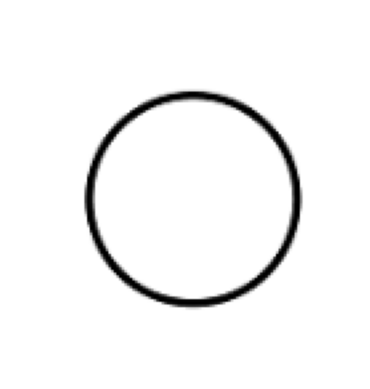

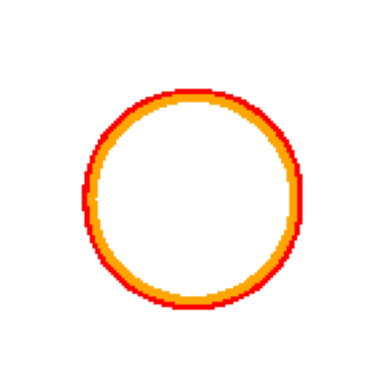

[('circle', (68, 70), 5043.0)]


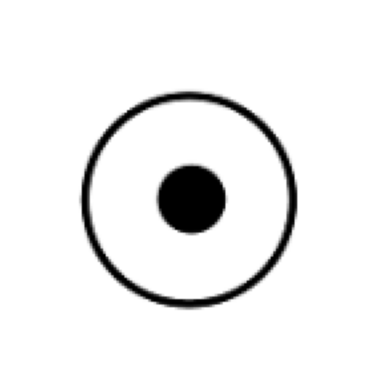

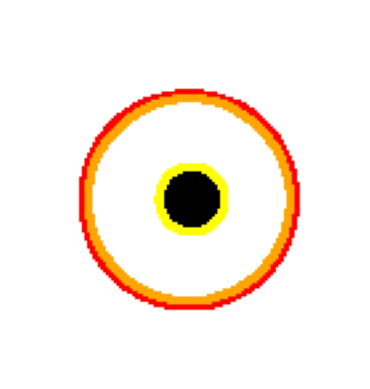

[('circle', (66, 71), 5049.5), ('circle', (67, 71), 476.0)]


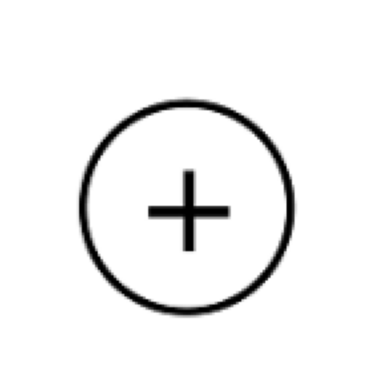

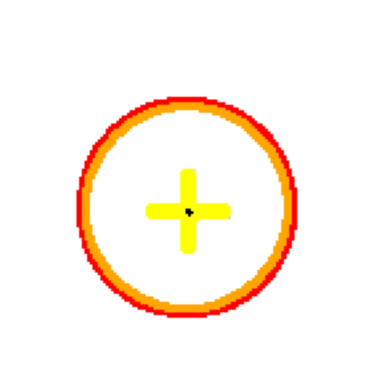

[('circle', (66, 74), 5054.0), ('circle', (66, 75), 168.5)]


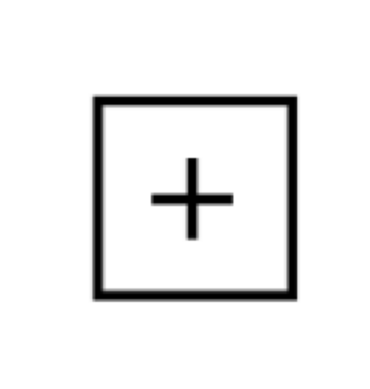

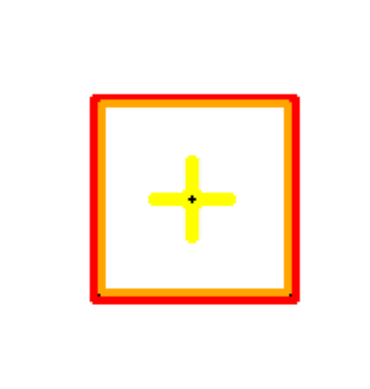

[('square', (69, 70), 5775.5), ('circle', (68, 71), 124.0)]


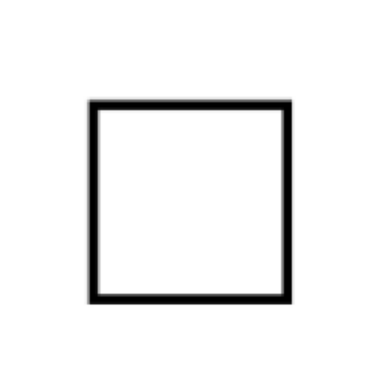

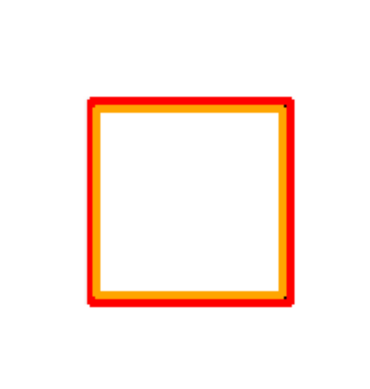

[('square', (67, 72), 5700.0)]


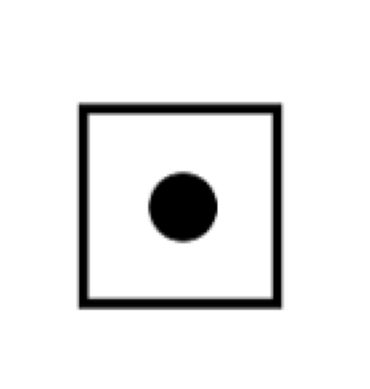

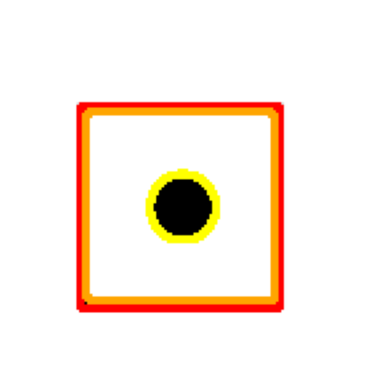

[('square', (63, 74), 5700.0), ('circle', (64, 73), 486.0)]


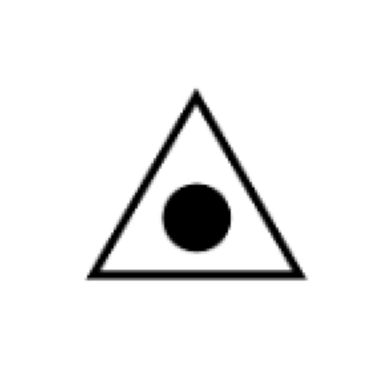

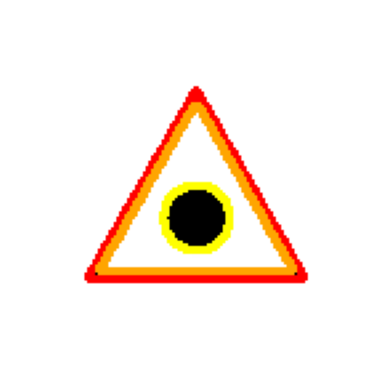

[('triangle', (69, 77), 2910.5), ('triangle', (69, 76), 2328.0), ('circle', (69, 77), 479.0)]


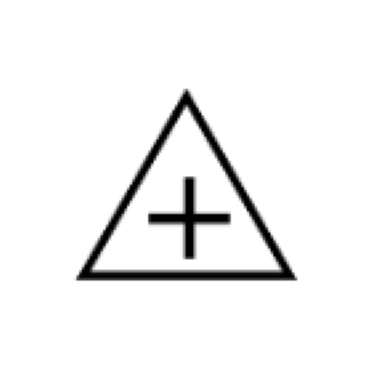

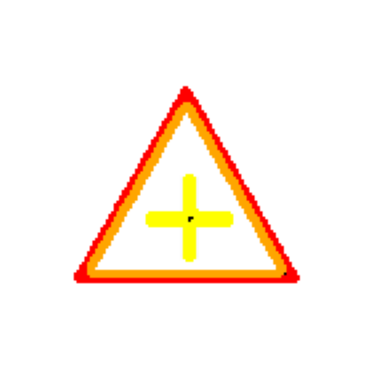

[('triangle', (65, 77), 2896.0), ('circle', (67, 78), 146.5)]
Processing IQ test number 16 at path iq_images/iq16.png


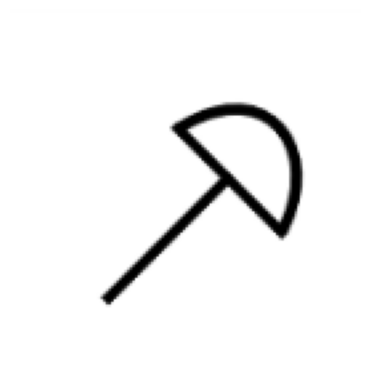

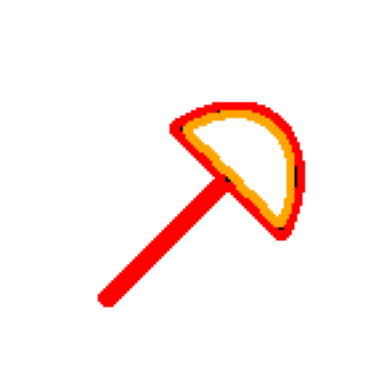

[('circle', (84, 60), 1544.5), ('rectangle', (89, 55), 867.5)]


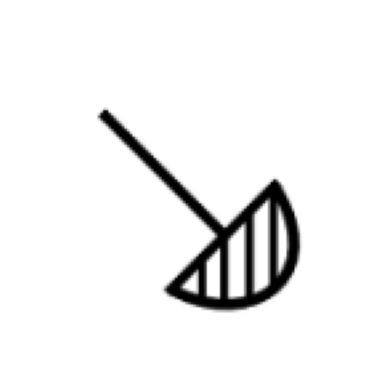

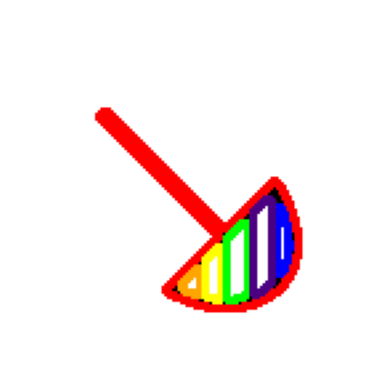

[('circle', (83, 88), 1539.5), ('diamond', (68, 102), 44.5), ('rectangle', (76, 99), 102.5), ('rectangle', (85, 95), 206.5), ('triangle', (101, 86), 85.0), ('rectangle', (94, 88), 225.0)]


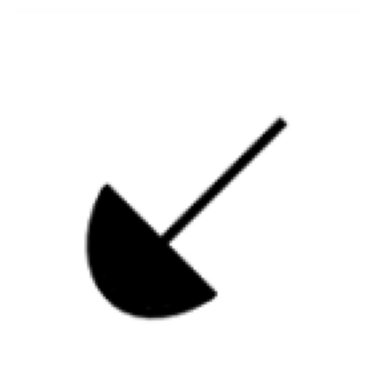

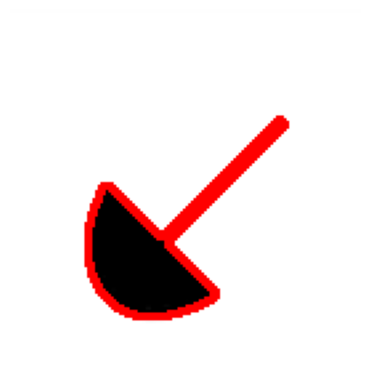

[('circle', (51, 91), 1513.0)]


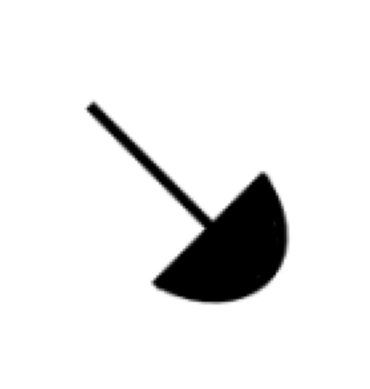

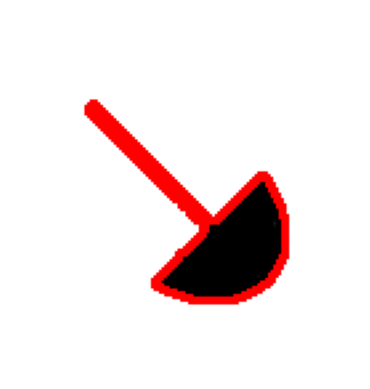

[('circle', (78, 85), 1522.5)]


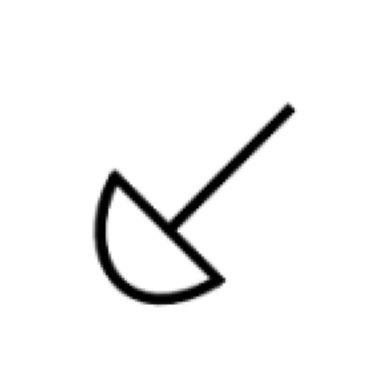

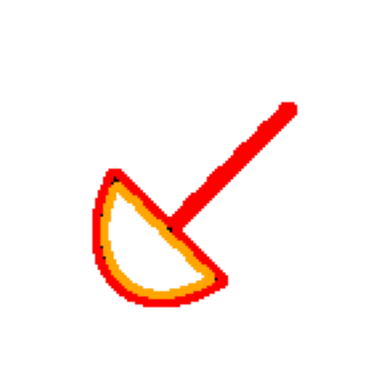

[('circle', (55, 86), 1522.5), ('rectangle', (50, 90), 867.0)]


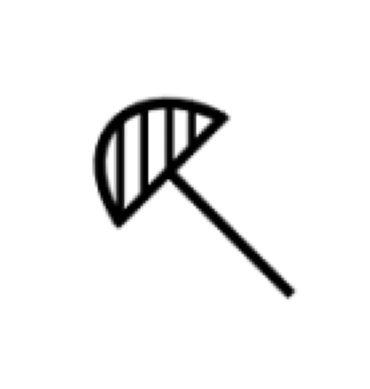

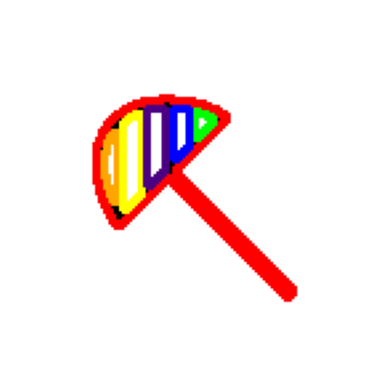

[('circle', (56, 57), 1535.5), ('triangle', (37, 58), 98.0), ('rectangle', (45, 56), 224.0), ('triangle', (71, 42), 42.5), ('rectangle', (63, 45), 100.0), ('rectangle', (54, 50), 183.5)]


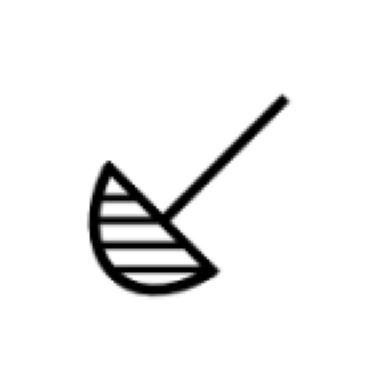

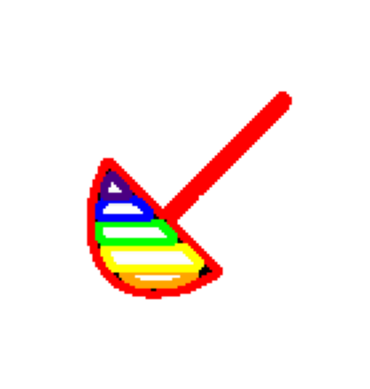

[('circle', (53, 82), 1536.5), ('rectangle', (55, 100), 108.0), ('rectangle', (52, 93), 256.5), ('rectangle', (46, 83), 180.5), ('circle', (41, 74), 114.0), ('circle', (38, 66), 46.5)]


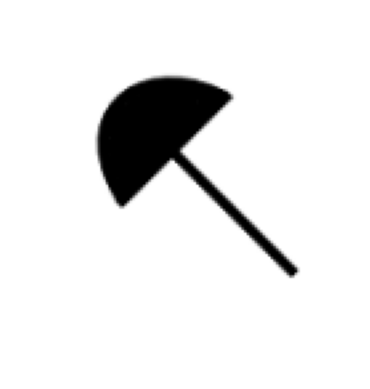

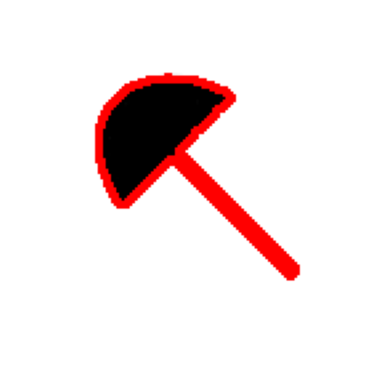

[('circle', (57, 49), 1557.0)]
Processing IQ test number 18 at path iq_images/iq18.png


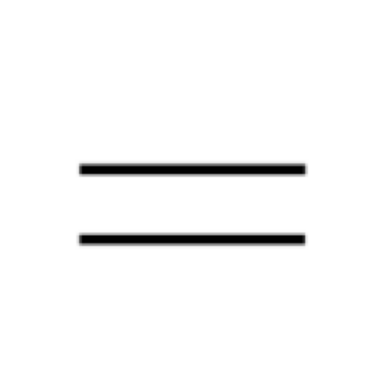

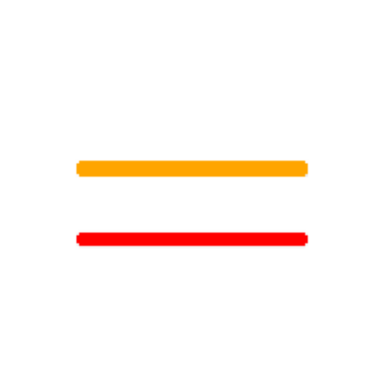

[('circle', (68, 86), 168.0), ('circle', (68, 59), 251.0)]


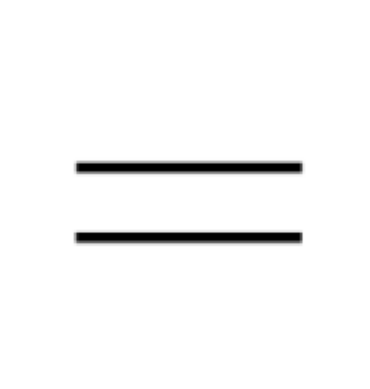

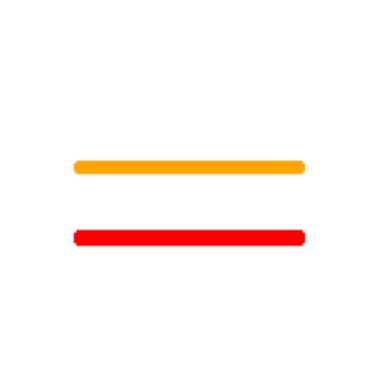

[('circle', (66, 85), 251.5), ('circle', (67, 59), 168.0)]


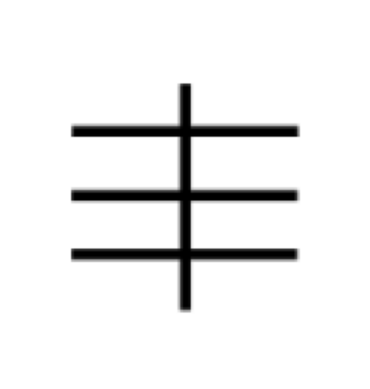

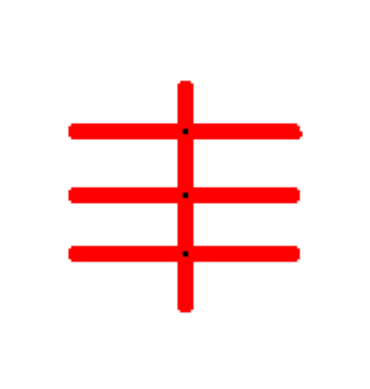

[('circle', (65, 69), 987.5)]


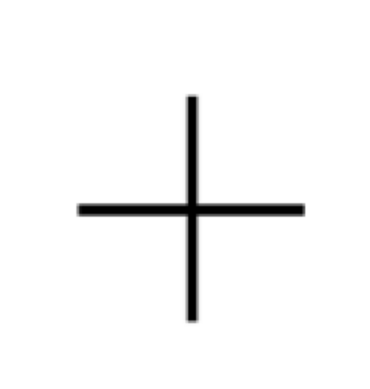

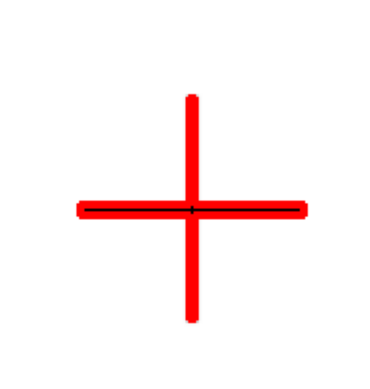

[('circle', (67, 74), 495.0)]


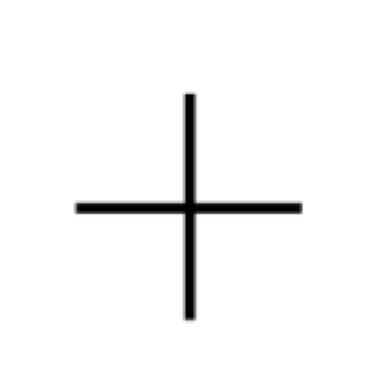

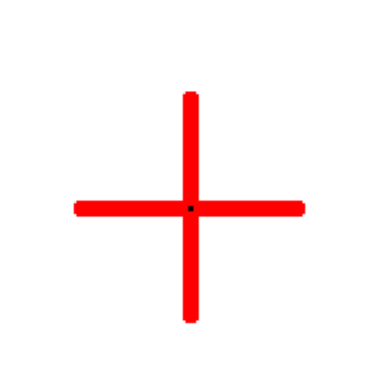

[('circle', (67, 74), 496.5)]


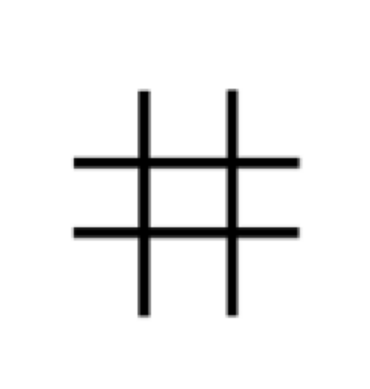

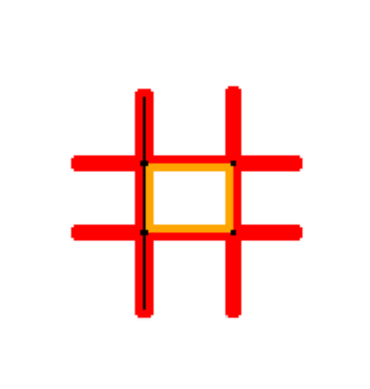

[('circle', (65, 71), 1741.5), ('square', (67, 70), 688.0)]


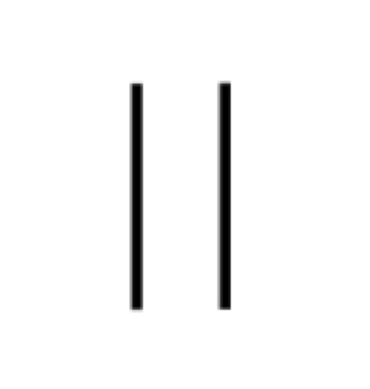

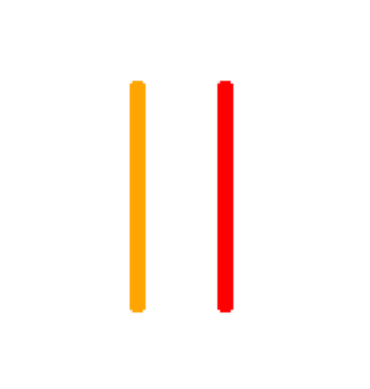

[('circle', (80, 70), 252.0), ('circle', (47, 70), 252.0)]


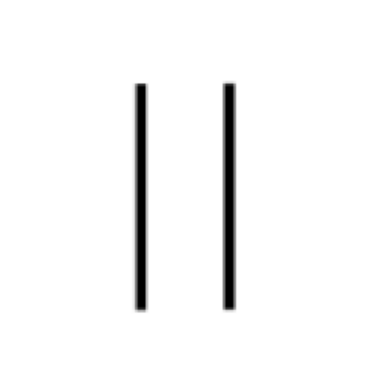

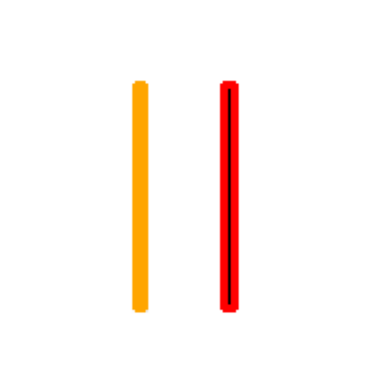

[('circle', (82, 70), 334.0), ('circle', (48, 70), 251.5)]


In [6]:

def is_cross(approx, contour):
    # Heuristic criteria for a cross:
    # 1. A large number of vertices.
    # 2. A large perimeter-to-area ratio.
    print(len(approx))
    if len(approx) < 8:
        return False

    area = cv2.contourArea(contour)
    peri = cv2.arcLength(contour, True)
    ratio = peri / math.sqrt(area) if area != 0 else 0
    print(ratio)
    # Threshold values would need to be determined experimentally based on the expected size of crosses
    if ratio > 10:  # This threshold would need to be adjusted based on the specific images
        # Further checks could include angle measurements
        return True
    return False

# Function to remove duplicates based on the position of the centroids
def remove_duplicates(shapes, threshold=5):
    # If there are no shapes or just one, there's no need to check for duplicates
    if len(shapes) <= 1:
        return shapes
    
    # Keep track of indexes to remove
    idx_to_remove = set()

    # Compare each shape with every other shape in the list
    for i in range(len(shapes) - 1):
        for j in range(i + 1, len(shapes)):
            # rules for duplicate shapes:
            # 1. same shape
            # 2. centroid is within a certain distance
            # 3. size is within 20% of each other
            if shapes[i][0] == shapes[j][0] and dist.euclidean(shapes[i][1], shapes[j][1]) < threshold and abs(shapes[i][2] - shapes[j][2]) / shapes[i][2] < 0.2:
                idx_to_remove.add(j)
    
    # Remove duplicates by index
    shapes = [shape for idx, shape in enumerate(shapes) if idx not in idx_to_remove]
    return shapes

# Modify the classify_shape function to distinguish between squares, rectangles, and diamonds
def classify_shape_with_position_and_size(contour):
    shape = "unidentified"
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * peri, True)

    # Compute the center of the contour
    M = cv2.moments(contour)
    cX = int((M["m10"] / M["m00"])) if M["m00"] else 0
    cY = int((M["m01"] / M["m00"])) if M["m00"] else 0

    # Check the number of vertices in the approximated contour to determine the shape
    num_vertices = len(approx)
    # if is_cross(approx, contour):
    #     shape = "cross"
    if num_vertices == 3:
        shape = "triangle"
    elif num_vertices == 4:
        # Calculate the distances between the vertices
        edges = [cv2.norm(approx[i][0] - approx[(i + 1) % 4][0]) for i in range(4)]
        # Calculate the cosine of the angle for all corners
        angles = []
        for i in range(4):
            dot_product = np.dot(approx[i][0] - approx[(i - 1) % 4][0], approx[i][0] - approx[(i + 1) % 4][0])
            norm_product = np.linalg.norm(approx[i][0] - approx[(i - 1) % 4][0]) * np.linalg.norm(approx[i][0] - approx[(i + 1) % 4][0])
            angle = np.arccos(dot_product / norm_product) * 180. / np.pi
            angles.append(angle)
        
        # Check if all sides are of equal length
        if np.std(edges) < 5:  # Small standard deviation implies equal lengths
            # Check if all angles are approximately 90 degrees
            if all(80 <= angle <= 100 for angle in angles):  # Tolerance for the angles
                shape = "square"
            else:
                shape = "diamond"
        else:
            shape = "rectangle"
    # elif num_vertices == 5:
    #     shape = "pentagon"
    # elif num_vertices == 6:
    #     shape = "hexagon"
    # elif num_vertices > 6:
    else:
        shape = "circle"  # Simplified condition for circle detection

    # Calculate the area for the identified shapes
    area = cv2.contourArea(contour) if shape != "unidentified" else 0

    return shape, (cX, cY), area
# Given an image, return a list of what shapes are available in the image.
def get_shapes(image):
    contours = get_contours(image)

    # List to hold the shape types and positions
    shapes_with_positions = []

    # Loop over the contours
    for cnt in contours:
        # Get the shape type and position
        shape_data = classify_shape_with_position_and_size(cnt)
        shapes_with_positions.append(shape_data)

    shapes_with_positions = remove_duplicates(shapes_with_positions)
    return shapes_with_positions

def get_shapes_2(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    binary_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    labeled_image, num_features = ndimage.label(binary_image)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_np = np.array(gray_image)
    objects = measure.regionprops(labeled_image, intensity_image=image_np)

    # The coordinates are given as (row, col), which corresponds to (y, x) in image coordinates
    # We need to swap them to (x, y) to match typical Cartesian coordinates
    positions = [(int(obj.centroid[1]), int(obj.centroid[0])) for obj in objects]

    # Assuming that the plus sign will have a larger area than the circles
    # Sort objects based on area and the last one will be the plus sign
    sorted_objects = sorted(objects, key=lambda x: x.area, reverse=True)

    # The largest area object is assumed to be the plus sign
    plus_sign_position = (int(sorted_objects[0].centroid[1]), int(sorted_objects[0].centroid[0]))

    # The rest are circles
    circle_positions = [(int(obj.centroid[1]), int(obj.centroid[0])) for obj in sorted_objects[1:]]

    print("Plus sign position:", plus_sign_position)
    print("Circle positions:", circle_positions)


# print(get_shapes(get_image('circle_square.png')))

for iq_number in [3, 16, 18]:
    file_path = get_file_path(iq_number)
    print(f"Processing IQ test number {iq_number} at path {file_path}")
    image = get_image(file_path)

    # Collect the 9 cells from an image, and get descriptions of each.
    cells = iq_test_to_squares(image)
    for i, cell in enumerate(cells):
        if i == 8:
            continue
        shape = get_shapes(cell)
        show_image(cell)
        # get_contours(cell)
        show_image(draw_contours(cell, get_contours(cell)))
        print(shape)
        # get_shapes_2(cell)

a
cross
a
not cross
a
cross
a
cross


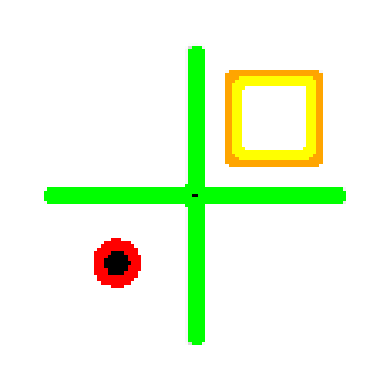

In [7]:
img = get_image("cross2.png")
contours = get_contours(img)
for cnt in contours:
    print("a")
    # Determine if this contour is a cross if it is roughly based around the x-axis and y-axis (no outliers)
    # Essentially, track each point, and they should all lie within the two lines: horizontal and vertical
    # TODO
    # Calculate centroid of the contour
    M = cv2.moments(cnt)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])

    # Tolerance for determining if a point lies on the cross axis
    tolerance = 10  # you can adjust this value

    is_cross = True
    for point in cnt:
        x, y = point[0]
        # Check if point is close to either the horizontal or vertical line through the centroid
        if abs(x - cx) > tolerance and abs(y - cy) > tolerance:
            is_cross = False
            break

    if is_cross:
        print("cross")
    else:
        print("not cross")

img = draw_contours(img, contours)
show_image(img)

Original, Horizontal line flipped Original


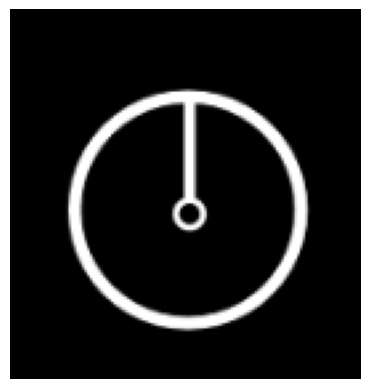

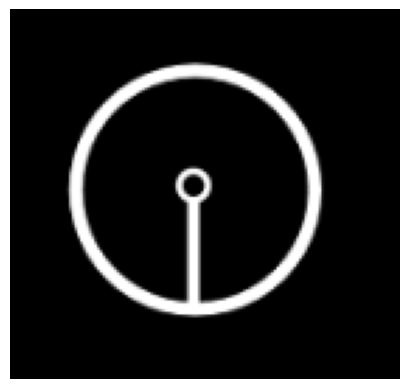

SyntaxError: 'return' outside function (1396733774.py, line 90)

In [8]:
imgs = iq_test_to_squares(get_image('iq_images/iq17.png'))

# invert the colors (black to white, white to black)
for i in range(len(imgs)):
    imgs[i] = cv2.bitwise_not(imgs[i])

def RotateAugmentation(angle):
    """
    Rotate clockwise by the given angle.
    """
    def rotate(image):
        return ndimage.rotate(image, -angle, reshape=False)
    return rotate

def CropAugmentation(x, y, w, h):
    def crop(image):
        return image[y:y+h, x:x+w]
    return crop

def TranslateAugmentation(dx, dy):
    def translate(image):
        return ndimage.shift(image, (dy, dx))
    return translate

def ScaleAugmentation(sx, sy):
    def scale(image):
        return cv2.resize(image, (0, 0), fx=sx, fy=sy)
    return scale

def ShearAugmentation(shear):
    def shear(image):
        shear_matrix = np.array([
            [1, shear],
            [0, 1]
        ])
        return cv2.warpAffine(image, shear_matrix, (image.shape[1], image.shape[0]))
    return shear

def ColorChangeAugmentation(shift):
    def color_change(image):
        return image + shift
    return color_change

def FlipAugmentation(angle):
    """
    Flip the image by the given angle, crossing the center of the image.
    Angle is in degrees. 0 is a vertical axis, going clockwise, 180 is a horizontal axis.
    """
    # Base angle type goes counterclockwise, reverse this
    angle = -angle
    def flip(image):
        # Calculate the center of the image
        center = np.array(image.shape[:2])[::-1] / 2.0
        
        # Compute the transformation matrix
        rotation_matrix = cv2.getRotationMatrix2D(tuple(center), angle, 1.0)
        
        # Perform the affine transformation
        rotated_image = cv2.warpAffine(image, rotation_matrix, image.shape[:2], flags=cv2.INTER_LINEAR)
        
        return rotated_image

    return flip

def augmentation_score(augmentation, org_img, dest_img):
    augmented_image = augmentation(org_img)
    show_image(org_img)
    show_image(augmented_image)
    return np.sum(np.abs(augmented_image - dest_img))

def avg_augmentation_score(augmentation, images):
    # Get all transitions from one image to another as pairs of images
    transitions = [(images[i], images[i+1]) for i in range(len(images) - 1)]
    # Calculate the score for each transition
    scores = [augmentation_score(augmentation, img1, img2) for img1, img2 in transitions]
    # Return the average score
    return np.mean(scores)

names = ["Rotate 45 CW", "Rotate 90 CW", "Flip Horizontal", "Flip Vertical", "Rotate 45 CCW", "Rotate 90 CCW"]
augmentations = [RotateAugmentation(45), RotateAugmentation(90), FlipAugmentation(90), FlipAugmentation(0), RotateAugmentation(-45), RotateAugmentation(-90)]

left_to_right_transitions = [[(imgs[0], imgs[1]), (imgs[1], imgs[2])], [(imgs[3], imgs[4]), (imgs[4], imgs[5])], [(imgs[6], imgs[7]), (imgs[7], imgs[8])]]

# Look at a vertical flip from 0 to 1
print("Original, Horizontal line flipped Original")

show_image(imgs[0])
show_image(FlipAugmentation(180)(imgs[0]))

return

for name, aug in zip(names, augmentations):
    print(name)
    scores = [[augmentation_score(aug, img1, img2) for img1, img2 in row] for row in left_to_right_transitions]
    scores[2][1] = 0 # No transition for the last cell
    print(scores)

# Actual pattern:
# Rotate 45, Rotate 90
# (from row 1 to row 2)

# Look at how a rotate of 45 degrees from 0 to 1 looks like
print("Original, Destination, Augmented Original")
names = ["From 0 to 1", "From 1 to 2"]
ids = [(0, 1), (1, 2)]
augmentations = [("Rotate 45", RotateAugmentation(45)), ("Rotate 90", RotateAugmentation(90))]
augmentations = [("Rotate 90 CW", RotateAugmentation(90)), ("Rotate 90 CCW", RotateAugmentation(-90))]
augmentations = [("Flip horiz", FlipAugmentation(90)), ("Flip vertical", FlipAugmentation(0))]
for names, id in zip(names, ids):
    print(names)
    first, second = id
    for desc, aug in augmentations:
        print(desc)
        show_image(imgs[first])
        show_image(imgs[second])
        show_image(aug(imgs[first]))
        print(f"Score = {augmentation_score(aug, imgs[first], imgs[second])}")

show_images_grid(imgs)


In [ ]:
# New approach: Use Gradient Descent or similar to learn the parameters of the augmentation.
# We have base augmentations: Rotate, Flipping, Stretching, Cropping, Color change, and Translation. (Potential: bitwise logic like XOR)
